# Testing of the patt_mcmc module's adjustment types

In [1]:
from patt_mcmc import patt_mcmc
import mcmc_utils as mcu
import plotting_functions as pfs
import numpy as np
import numpy.linalg as alg
import numpy.random as rnd
import matplotlib.pyplot as plt

In [2]:
d = 37
n_chains = 10
x_0s = rnd.normal(size=(n_chains,d))
w = d

### No Transformation

In [3]:
n_burn = 0
n_its = int(1e4)

In [4]:
def log_density(x):
    return -alg.norm(x)

In [5]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    hyper_att=w
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/10001 [00:00<?, ?it/s]

Assembling output...


In [6]:
samples = rets['samples']
tde_cnts = rets['tde_cnts']

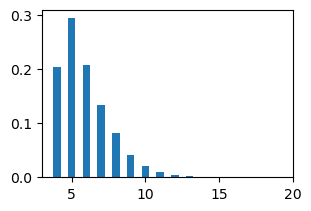

In [7]:
pfs.plot_tde_distr(tde_cnts[1:])

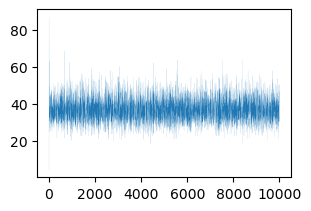

In [8]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii, lw=0.05)

### Mean-Centering

In [9]:
n_burn = int(1e3)
n_its = int(1e5)

In [10]:
c = np.arange(1,d+1)

def log_density(x):
    return -alg.norm(x - c)

In [11]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    "mean",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [12]:
burn_in = rets['burn-in']
tde_cnts_burn = rets['tde_cnts_burn']
samples = rets['samples']
means = rets['means']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']

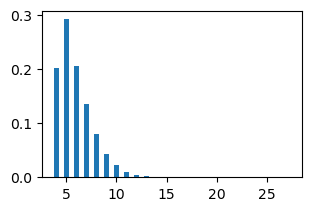

In [13]:
pfs.plot_tde_distr(tde_cnts[1:])

In [14]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

4.518466779261938e-12

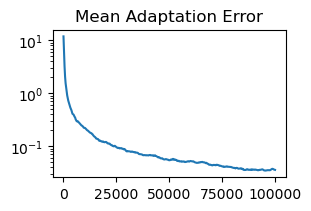

In [15]:
pfs.plot_ada_progress_testing(schedule, means, c, "Mean")

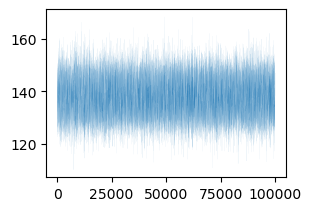

In [16]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Median-Centering

In [17]:
n_burn = int(1e3)
n_its = int(1e5)

In [18]:
c = np.arange(1,d+1)

def log_density(x):
    return -alg.norm(x - c)

In [19]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    "medi",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [20]:
burn_in = rets['burn-in']
samples = rets['samples']
medians = rets['medians']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']

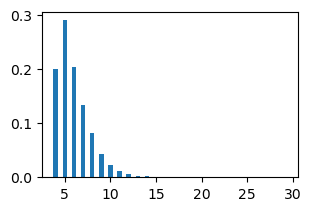

In [21]:
pfs.plot_tde_distr(tde_cnts[1:])

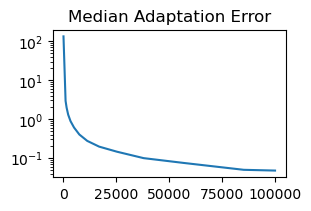

In [22]:
pfs.plot_ada_progress_testing(schedule, medians, c, "Median")

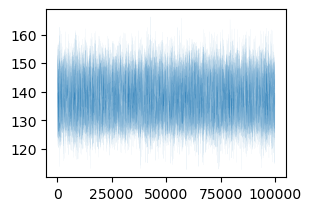

In [23]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Variance Adjustments

In [24]:
n_burn = int(1e3)
n_its = int(1e5)

In [25]:
std = np.arange(2,d+2)

def log_density(x):
    return -alg.norm(x / std)**2 / 2

In [26]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    cov_mode="var",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [27]:
burn_in = rets['burn-in']
samples = rets['samples']
means = rets['means']
std_devs = rets['std_devs']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']

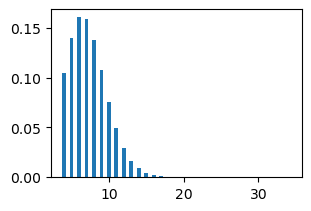

In [28]:
pfs.plot_tde_distr(tde_cnts[1:])

In [29]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

3.5295847088962925e-15

In [30]:
# compare recursively computed standard devs with naively computed one
alg.norm(std_devs[-1] - np.std(samples, axis=(0,1)))

6.896925003001141e-05

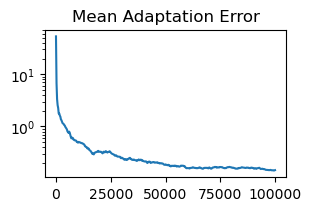

In [31]:
pfs.plot_ada_progress_testing(schedule, means, np.zeros(d), "Mean")

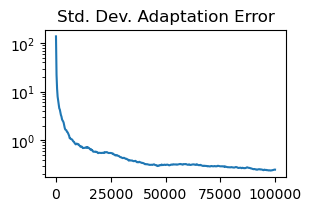

In [32]:
pfs.plot_ada_progress_testing(schedule, std_devs, std, "Std. Dev.")

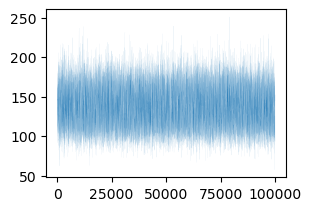

In [33]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Mean-Centering and Variance Adjustments

In [34]:
n_burn = int(1e3)
n_its = int(1e5)

In [35]:
c = np.arange(1,d+1)
std = np.arange(2,d+2)

def log_density(x):
    return -alg.norm((x - c) / std)**2 / 2

In [36]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    cen_mode="mean",
    cov_mode="var",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [37]:
burn_in = rets['burn-in']
samples = rets['samples']
means = rets['means']
std_devs = rets['std_devs']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']

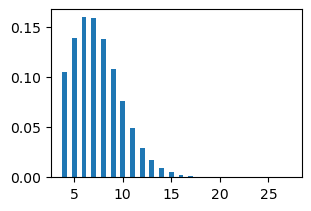

In [38]:
pfs.plot_tde_distr(tde_cnts[1:])

In [39]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

2.871077194127494e-12

In [40]:
# compare recursively computed standard devs with naively computed one
alg.norm(std_devs[-1] - np.std(samples, axis=(0,1)))

6.896376583903812e-05

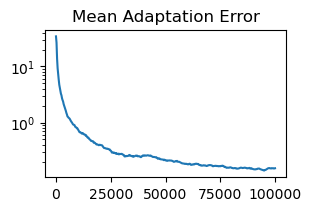

In [41]:
pfs.plot_ada_progress_testing(schedule, means, c, "Mean")

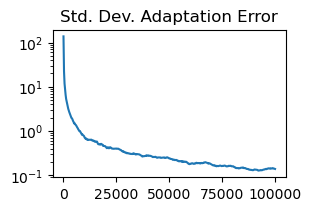

In [42]:
pfs.plot_ada_progress_testing(schedule, std_devs, std, "Std. Dev.")

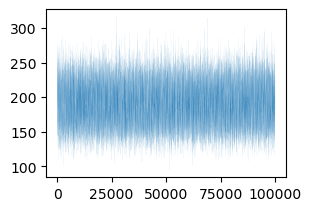

In [43]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Median-Centering and Variance Adjustments

In [44]:
n_burn = int(1e3)
n_its = int(1e5)

In [45]:
c = np.arange(1,d+1)
std = np.arange(2,d+2)

def log_density(x):
    return -alg.norm((x - c) / std)**2 / 2

In [46]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    cen_mode="medi",
    cov_mode="var",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [47]:
burn_in = rets['burn-in']
samples = rets['samples']
medians = rets['medians']
means = rets['means']
std_devs = rets['std_devs']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']

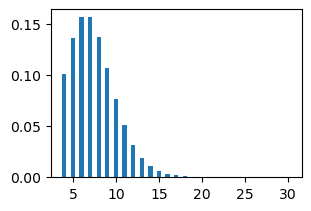

In [48]:
pfs.plot_tde_distr(tde_cnts[1:])

In [49]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

3.44405516057819e-12

In [50]:
# compare recursively computed standard devs with naively computed one
alg.norm(std_devs[-1] - np.std(samples, axis=(0,1)))

6.89401113661322e-05

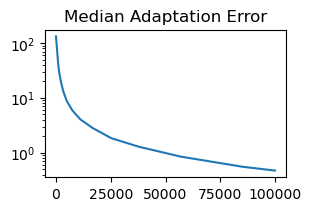

In [51]:
pfs.plot_ada_progress_testing(schedule, medians, c, "Median")

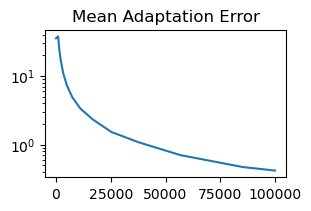

In [52]:
pfs.plot_ada_progress_testing(schedule, means, c, "Mean")

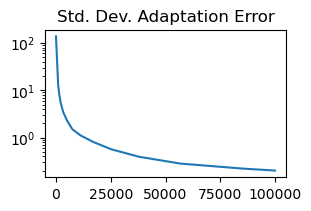

In [53]:
pfs.plot_ada_progress_testing(schedule, std_devs, std, "Std. Dev.")

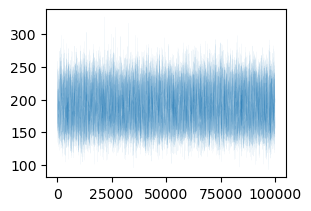

In [54]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Covariance Adjustments

In [55]:
n_burn = int(1e4)
n_its = int(1e5)

In [56]:
corr = 0.75
cov = np.full((d,d), corr) + (1 - corr) * np.identity(d)
inv_cov = alg.inv(cov)

def log_density(x):
    return -np.inner(x, inv_cov @ x) / 2

In [57]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    cov_mode="cov",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [58]:
burn_in = rets['burn-in']
samples = rets['samples']
means = rets['means']
covs = rets['covs']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']

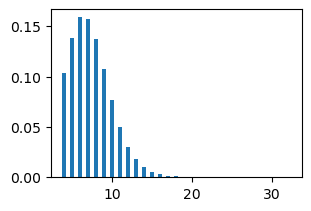

In [59]:
pfs.plot_tde_distr(tde_cnts[1:])

In [60]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

2.3872781182425813e-16

In [61]:
# compare recursively computed covs with naively computed one
alg.norm(covs[-1] - np.cov(samples.reshape(-1,d), rowvar=False))

8.059792491530089e-13

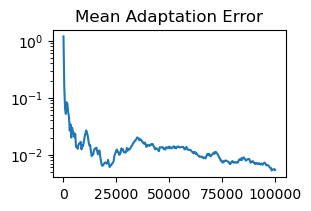

In [62]:
pfs.plot_ada_progress_testing(schedule, means, np.zeros(d), "Mean")

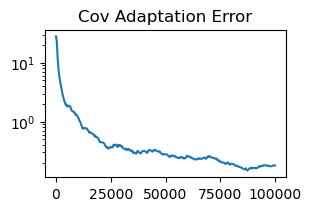

In [63]:
pfs.plot_ada_progress_testing(schedule, covs, cov, "Cov")

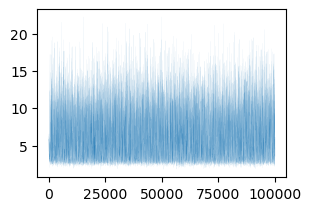

In [64]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Mean-Centering and Covariance Adjustments

In [65]:
n_burn = int(1e4)
n_its = int(1e5)

In [66]:
c = np.arange(1,d+1)
corr = 0.5
cov = np.full((d,d), corr) + (1 - corr) * np.identity(d)
inv_cov = alg.inv(cov)

def log_density(x):
    return -np.inner(x - c, inv_cov @ (x - c)) / 2

In [67]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    cen_mode="mean",
    cov_mode="cov",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [68]:
burn_in = rets['burn-in']
samples = rets['samples']
means = rets['means']
covs = rets['covs']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']

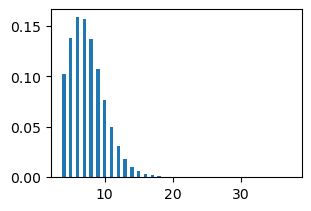

In [69]:
pfs.plot_tde_distr(tde_cnts[1:])

In [70]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

3.4634692998904252e-12

In [71]:
# compare recursively computed covs with naively computed one
alg.norm(covs[-1] - np.cov(samples.reshape(-1,d), rowvar=False))

1.9327075045741893e-11

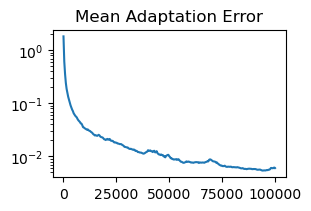

In [72]:
pfs.plot_ada_progress_testing(schedule, means, c, "Mean")

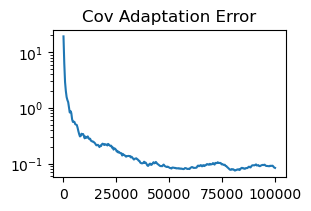

In [73]:
pfs.plot_ada_progress_testing(schedule, covs, cov, "Cov")

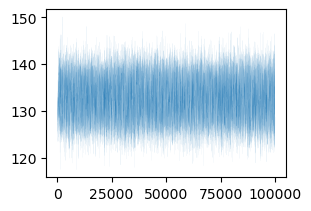

In [74]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)

### Median-Centering and Covariance Adjustments

In [75]:
n_burn = int(1e4)
n_its = int(1e5)

In [76]:
c = np.arange(1,d+1)
corr = 0.5
cov = np.full((d,d), corr) + (1 - corr) * np.identity(d)
inv_cov = alg.inv(cov)

def log_density(x):
    return -np.inner(x - c, inv_cov @ (x - c)) / 2

In [77]:
rets = patt_mcmc(
    log_density,
    n_chains,
    n_burn,
    n_its,
    x_0s,
    cen_mode="medi",
    cov_mode="cov",
    hyper_burn=w,
    hyper_att=w,
)

Checking validity of given arguments...
Preparing for parallel sampling...
Preparing for init burn-in period...
Starting init burn-in sampling...
Preparing for ATT sampling...
Starting ATT sampling...


  0%|          | 0/100001 [00:00<?, ?it/s]

Assembling output...


In [78]:
burn_in = rets['burn-in']
samples = rets['samples']
medians = rets['medians']
means = rets['means']
covs = rets['covs']
schedule = rets['schedule']
tde_cnts = rets['tde_cnts']

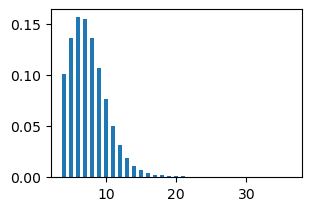

In [79]:
pfs.plot_tde_distr(tde_cnts[1:])

In [80]:
# compare recursively computed sample mean with naively computed one
alg.norm(means[-1] - np.mean(samples, axis=(0,1)))

3.760183586551489e-12

In [81]:
# compare recursively computed covs with naively computed one
alg.norm(covs[-1] - np.cov(samples.reshape(-1,d), rowvar=False))

8.923669311702622e-11

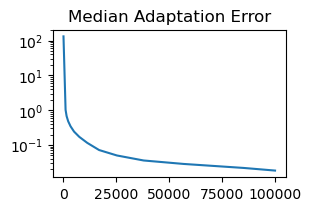

In [82]:
pfs.plot_ada_progress_testing(schedule, medians, c, "Median")

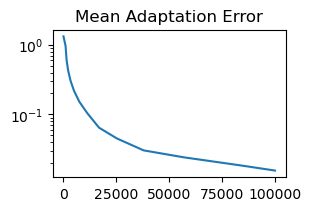

In [83]:
pfs.plot_ada_progress_testing(schedule, means, c, "Mean")

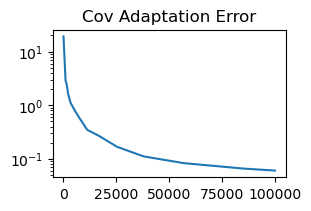

In [84]:
pfs.plot_ada_progress_testing(schedule, covs, cov, "Cov")

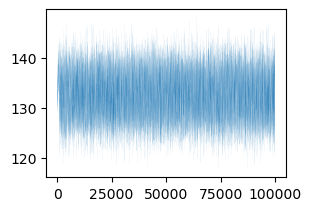

In [85]:
radii = mcu.get_radii(samples[:,0])
pfs.trace_plot(radii)